# Titanic Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is C4AD-9E5D

 Directory of D:\WORK\MOONLIGHT_PROJECT\YOU TUBE\Titanic Solution

15/06/2022  15:00    <DIR>          .
24/04/2022  22:50    <DIR>          ..
15/06/2022  13:51    <DIR>          .ipynb_checkpoints
23/04/2022  14:18                 0 .txt
13/06/2022  17:37    <DIR>          Belajar Data Science #1
01/06/2022  20:12    <DIR>          Belajar Data Science #2
13/06/2022  19:12    <DIR>          Belajar Data Science #3
15/06/2022  14:13    <DIR>          Belajar Data Science #4
14/06/2022  19:53           514.704 Belajar Data Science [Project] - Titanic.ipynb
21/05/2022  10:44    <DIR>          data
08/11/2019  16:59         1.225.590 Data Science_ Hype or Hero.pdf
24/05/2022  10:47    <DIR>          github
24/04/2022  22:12        20.859.778 rekaman fix.mp3
21/05/2022  15:18            12.388 research.docx
16/05/2022  22:29             3.265 submission.csv
09/04/2018  05:33            28.629 test.csv
15/06/2022  15:00        

In [3]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

## Identifikasi Data 

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

### Simple Barchart

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

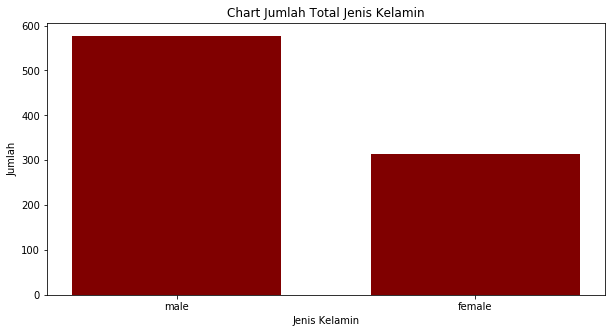

In [12]:
# menyiapkan data untuk simple barplot
count_sex = train['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values


# pembuatan simple barplot 
fig = plt.figure(figsize = (10, 5) )
plt.bar(index_sex, value_sex , color = "maroon",  width = 0.7) 


plt.title("Chart Jumlah Total Jenis Kelamin") # menambahkan judul
plt.xlabel("Jenis Kelamin")  # menambahkan judul di sumbu-x
plt.ylabel("Jumlah") # menambahkan judul di sumbu-y



plt.show()

In [13]:
# membuat function untuk simple barchart

def bar_chart(column):
  count = train[column].value_counts()

  index = count.index 
  values = count.values 

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.show()


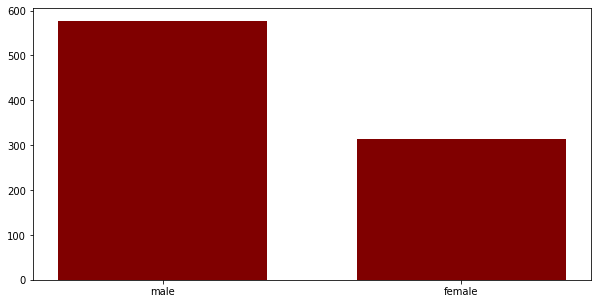

In [14]:
bar_chart("Sex")

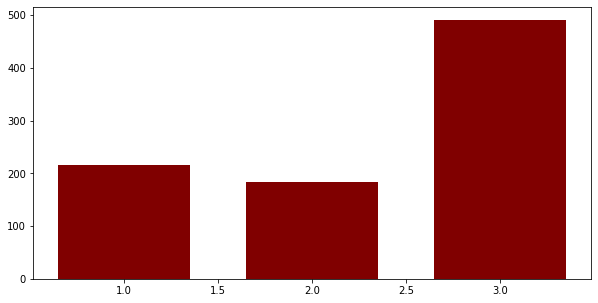

In [15]:
bar_chart("Pclass")

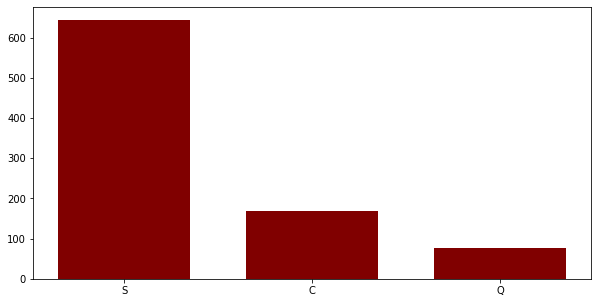

In [16]:
bar_chart("Embarked")

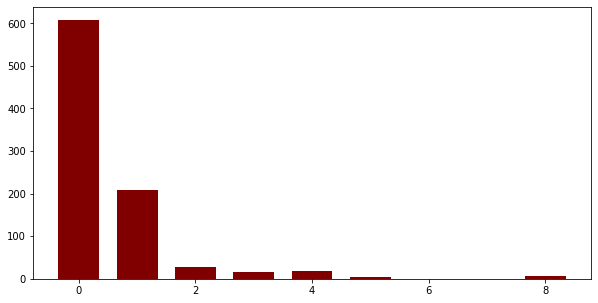

In [17]:
bar_chart("SibSp")

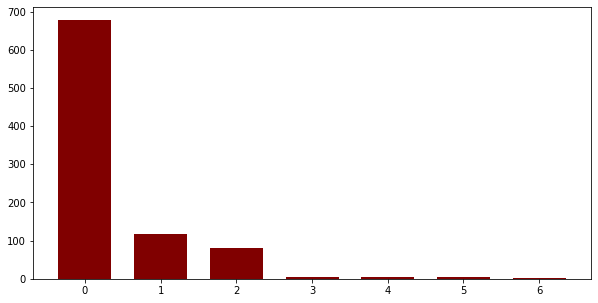

In [18]:
bar_chart("Parch")

### Grouped Barchart / Clustered Barchart

In [19]:
survived_sex = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()
survived_sex

Survived     Sex  PassengerId
0         0  female           81
1         0    male          468
2         1  female          233
3         1    male          109

In [20]:
# membuat fungsi untuk grouped barchart/clutered barchart 
def grouped_barchart(column): 
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind = "bar", 
      x = "Survived", y = "PassengerId", hue = column, 
      palette = "dark" , height = 6
  )

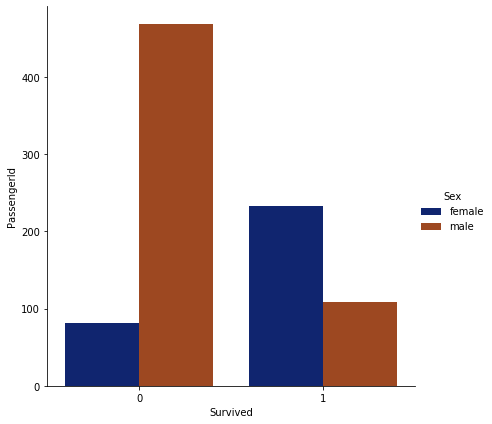

In [21]:
grouped_barchart("Sex")

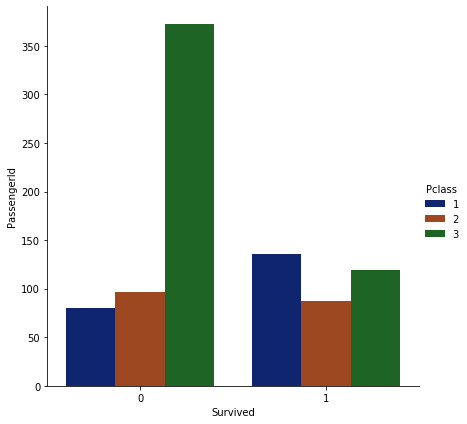

In [22]:
grouped_barchart("Pclass")

### Histogram

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


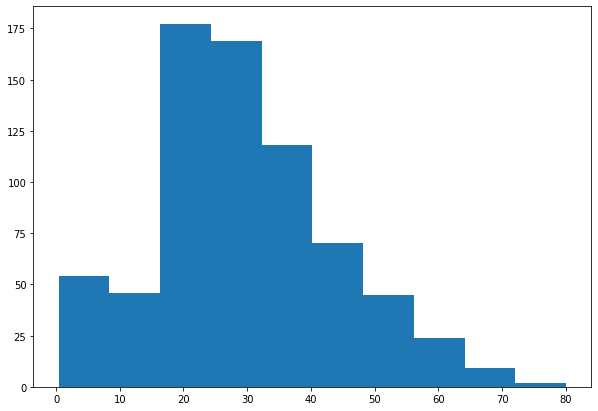

In [23]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)
plt.show()

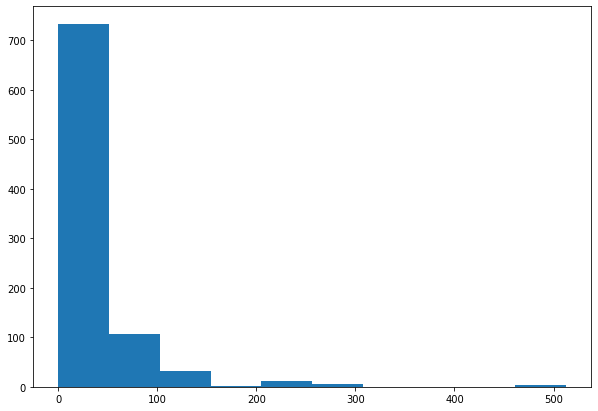

In [24]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

### KDE Plot (Kernel Density Estimate)

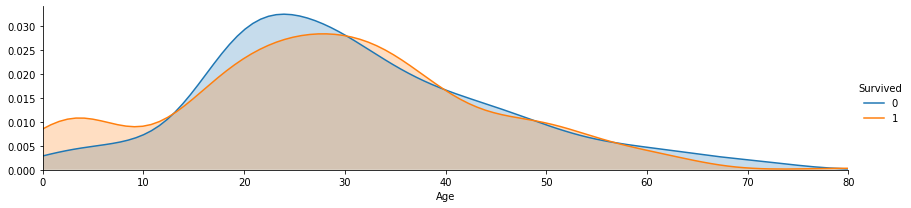

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

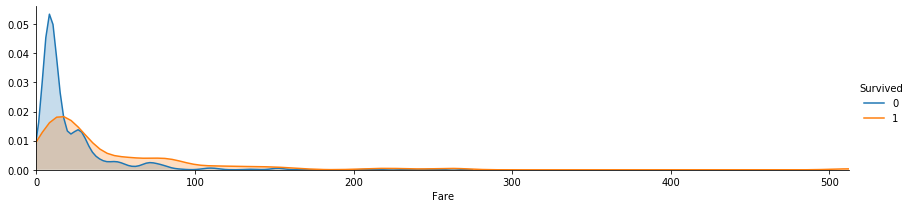

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

# Preprocessing Data

## Mengisi Missing Value

In [27]:
train.shape , test.shape

((891, 12), (418, 11))

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Mengisi Missing Value Categorical data

### Missing Value Data Embarked

In [30]:
train[train['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
mode_embarked = train['Embarked'].mode()[0]
mode_embarked

'S'

In [33]:
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

In [34]:
train[train['Embarked'].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [35]:
train[train['Embarked'].index == 61]

PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
61           62         1       1  Icard, Miss. Amelie  female  38.0      0   

    Parch  Ticket  Fare Cabin Embarked  
61      0  113572  80.0   B28        S

### Missing Value Data Age

In [36]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [37]:
train['Age'] = train["Age"].fillna(mean_age)

In [38]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [39]:
test['Age'] = test["Age"].fillna(mean_age_test)

### Missing Value Data Fare

In [40]:
mean_fare_test = test['Fare'].mean()

test['Fare'] = test['Fare'].fillna(mean_fare_test)

### Drop Data Cabin Karena terlalu banyak Missing Value

In [41]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1 )

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64